# Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

## Bollinger Bands
In this notebook, we will see how to code the strategy that we discussed in the video lecture. 

## Import the libraries
We will import the necessary libraries.

In [1]:
import talib as t
from talib import MA_Type
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Gold data
We will read the data for ETF linked to Gold Prices ('GLD') from CSV file. 

In [2]:
df = pd.read_csv('../data_modules/Gold_data.csv', index_col=0)
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,109.62,111.0000,109.37,110.47,7527353
2017-01-04,111.06,111.2200,110.61,110.86,4904119
2017-01-05,112.16,112.9400,112.07,112.58,9606761
2017-01-06,111.81,112.3800,111.57,111.75,7686070
2017-01-09,112.39,113.0399,112.18,112.67,5674636


## Value of 'n' for standard deviation

We will choose a time window (n) for calculating the standard deviation of returns and the bollinger bands. We chose 60 because this would contain the past one quarter's performance, as there are 60 trading days in a quarter.

In [3]:
n = 60

## Returns and standard deviation
Next, we will calculate the daily returns and the standard deviation of these returns.

In [4]:
df['Ret'] = df['Close'].pct_change()
df['R_Std'] = df['Ret'].rolling(window=n).std()

## Bollinger Bands
Now, it is time to calculate the Bollinger Bands. We do this by using the Ta-Lib library which has a bollinger bands function that returns the three Bollinger Bands.

In [5]:
df['upper'], df['middle'], df['lower'] = t.BBANDS(
    np.array(df['Close']), matype=MA_Type.T3)

## Signal column

We will create and populate the signal column as per the strategy criterion discussed in the video lecture. We check when the market cross the upper Bollinger Bands and compare that day's return with the standard deviation of returns. Similarly, we will apply the opposite criterion as discussed in the video for the lower Bollinger Bands
and break out.

In [6]:
df['Signal'] = 0

df.loc[(df['upper'].shift(2) > df['Close'].shift(2)) & (df['upper'].shift(1) < df['Close'].shift(1))
       & (df['R_Std'].shift(1) > df['Ret'].shift(1)), 'Signal'] = -1

df.loc[(df['lower'].shift(2) < df['Close'].shift(2)) & (df['lower'].shift(1) > df['Close'].shift(1))
       & (-df['R_Std'].shift(1) < df['Ret'].shift(1)), 'Signal'] = 1

## Strategy returns
We will now calculate the daily returns from the strategy.

In [7]:
df['Str_ret'] = df['Signal']*df['Ret']

## Number of trades
Next, we will calculate the number of trades generated.

In [8]:
trades = np.count_nonzero(df['Signal'])

## Plot the returns
Finally, we will plot the returns from the strategy to visualize it.

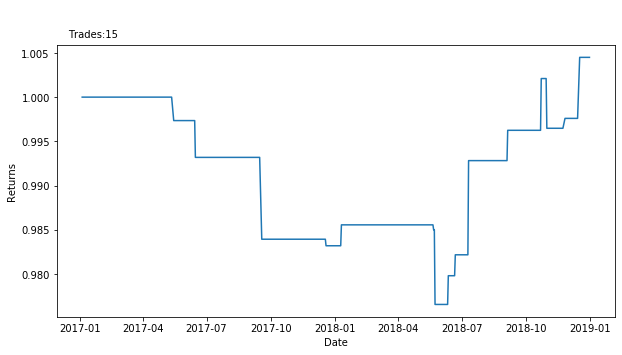

In [9]:
plt.figure(figsize=(10, 5))
plt.plot((df['Str_ret']+1).cumprod())
plt.figtext(0.14, 0.9, s='\n\nTrades:%i' % trades)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

In the upcoming units, we will practice these codes through interactive coding exercises.<br><br>